In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from utils import (
    ROOTDIR,
    AdjacencyMethod,
    DistanceTransformation,
    Normalizer,
    encode_variables_to_filename,
    read_dataset,
    setup_plotting,  # noqa: F401
)

# setup_plotting()

In [3]:
METRIC_COLUMNS = [
    "global_efficiency",  # x1
    "entropy",  # x2
    "hurst_rs",  # x3
    "fractal",  # x4
    "modularity",  # x5
    "assortativity",  # x6
    "estrada_index",  # x7
    "avg_katz",  # x8
    "avg_closeness",  # x9
    "avg_betweenness",  # x10
    "avg_laplacian",  # x11
]

## Configuration

In [4]:
def get_dataset_filename(
    event_filename: str = "all.txt",
    input_data: bool = False,
    use_threshold: bool = False,
) -> pd.DataFrame:
    filename = encode_variables_to_filename(
        event_filename=event_filename,
        imput_data=input_data,
        use_threshold=use_threshold,
    )

    dataset_df = read_dataset(ROOTDIR / "data" / filename)
    return dataset_df

### Configuration 1

* Default data per event: `event_filename = "all.txt"`
* Without inputing data: `input_data = False`
* If the column have nan, drop it: `use_threshold = False`

In [5]:
event_filename = "all.txt"
input_data = False
use_threshold = False

dataset_df_conf1 = get_dataset_filename(
    event_filename="all.txt",
    input_data=False,
    use_threshold=False,
)

In [6]:
distance_transformation = DistanceTransformation.EXPONENTIAL
norm_method = Normalizer.Z_SCORE
adjacency_method = AdjacencyMethod.MANHATTAN

df0 = dataset_df_conf1[
    (dataset_df_conf1["transformation"] == distance_transformation.value)
    & (dataset_df_conf1["normalization"] == norm_method.value)
    & (dataset_df_conf1["adjacency_method"] == adjacency_method.value)
].sort_values(by="intensity")[[*METRIC_COLUMNS, "intensity"]]

plot_df = df0.melt(id_vars="intensity", var_name="metric", value_name="value")

/tmp/ipykernel_277538/2789543175.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


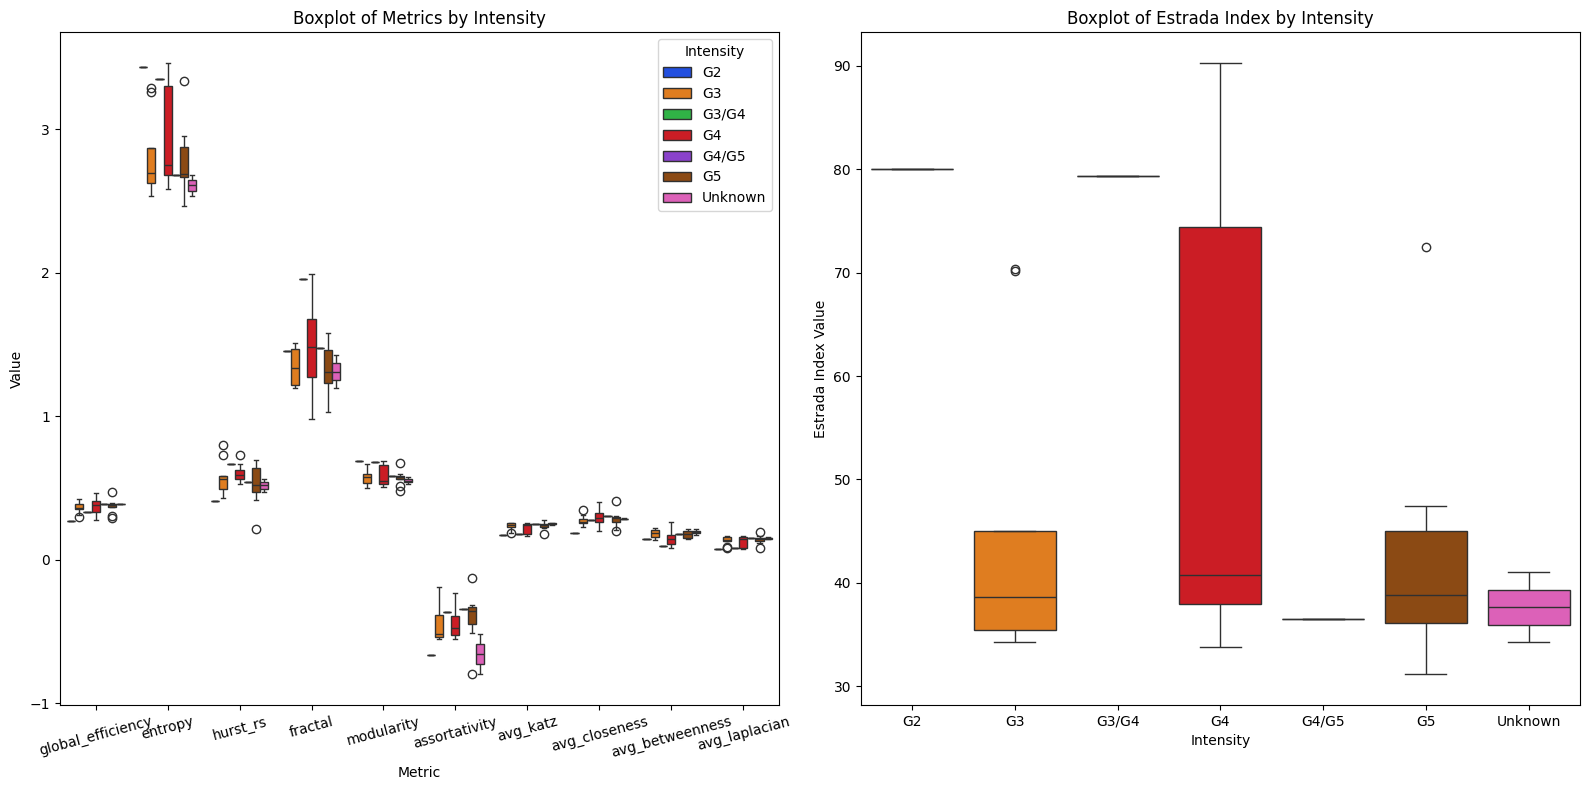

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Boxplot for each metric by except "estrada_index"
sns.boxplot(
    x="metric",
    y="value",
    hue="intensity",
    data=plot_df[plot_df["metric"] != "estrada_index"],
    ax=axes[0],
    palette="bright",
)
axes[0].set_title("Boxplot of Metrics by Intensity")
axes[0].set_xlabel("Metric")
axes[0].set_ylabel("Value")
axes[0].tick_params(axis="x", rotation=15)

axes[0].legend(title="Intensity", loc="upper right")

# Boxplot for "estrada_index" metric by intensity
sns.boxplot(
    x="intensity",
    y="value",
    data=plot_df[plot_df["metric"] == "estrada_index"],
    ax=axes[1],
    palette="bright",
)
axes[1].set_title("Boxplot of Estrada Index by Intensity")
axes[1].set_xlabel("Intensity")
axes[1].set_ylabel("Estrada Index Value")

fig.tight_layout()
plt.show()

## Configuration 2

* Imputed data previously: `event_filename = "all.imp.txt"`
* Without imputing data on my own: `input_data = False`
* If the column have nans, drop it: `use_threshold = False`

In [12]:
dataset_df_conf2 = get_dataset_filename(
    event_filename="all.imp.txt",
    input_data=False,
    use_threshold=False,
)

distance_transformation = DistanceTransformation.EXPONENTIAL
norm_method = Normalizer.Z_SCORE
adjacency_method = AdjacencyMethod.MINKOWSKI

df0 = dataset_df_conf2[
    (dataset_df_conf2["transformation"] == distance_transformation.value)
    & (dataset_df_conf2["normalization"] == norm_method.value)
    & (dataset_df_conf2["adjacency_method"] == adjacency_method.value)
].sort_values(by="intensity")[[*METRIC_COLUMNS, "intensity"]]

plot_df = df0.melt(id_vars="intensity", var_name="metric", value_name="value")

/tmp/ipykernel_277538/3367609097.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/tmp/ipykernel_277538/3367609097.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/tmp/ipykernel_277538/3367609097.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/tmp/ipykernel_277538/3367609097.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/tmp/ipykernel_277538/3367609097.py:5: F

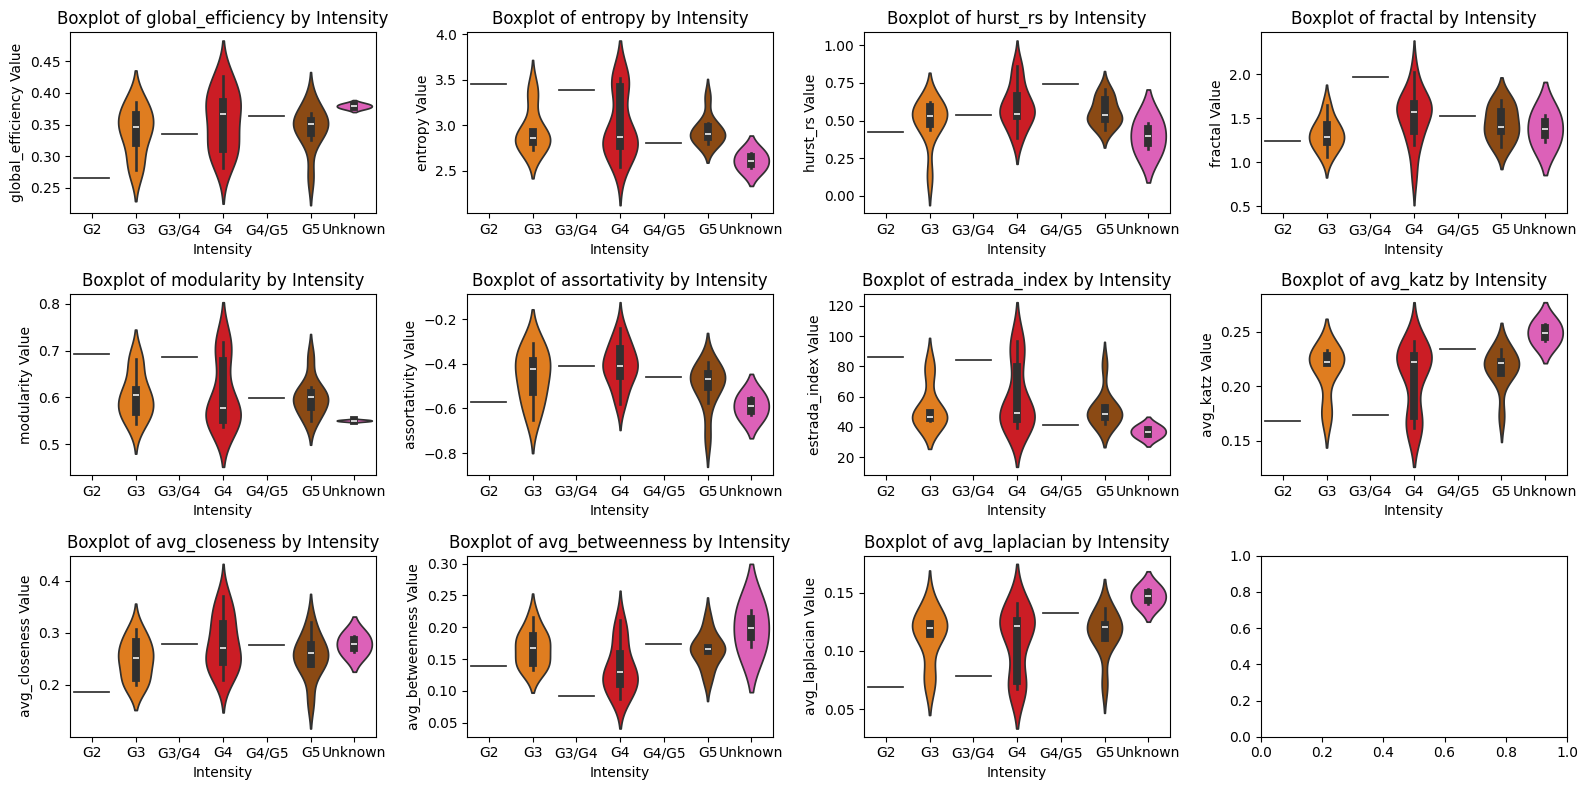

In [15]:
fig, axes = plt.subplots(3, 4, figsize=(16, 8))

metric = plot_df["metric"].unique()
for metric, ax in zip(metric, axes.flatten()):
    sns.violinplot(
        x="intensity",
        y="value",
        data=plot_df[plot_df["metric"] == metric],
        ax=ax,
        palette="bright",
    )
    ax.set_title(f"Boxplot of {metric} by Intensity")
    ax.set_xlabel("Intensity")
    ax.set_ylabel(f"{metric} Value")

# # Boxplot for each metric by except "estrada_index"
# sns.boxplot(
#     x="metric",
#     y="value",
#     hue="intensity",
#     data=plot_df[plot_df["metric"] != "estrada_index"],
#     ax=axes[0],
#     palette="bright",
# )
# axes[0].set_title("Boxplot of Metrics by Intensity")
# axes[0].set_xlabel("Metric")
# axes[0].set_ylabel("Value")
# axes[0].tick_params(axis="x", rotation=15)

# axes[0].legend(title="Intensity", loc="upper right")

# # Boxplot for "estrada_index" metric by intensity
# sns.boxplot(
#     x="intensity",
#     y="value",
#     data=plot_df[plot_df["metric"] == "estrada_index"],
#     ax=axes[1],
#     palette="bright",
# )
# axes[1].set_title("Boxplot of Estrada Index by Intensity")
# axes[1].set_xlabel("Intensity")
# axes[1].set_ylabel("Estrada Index Value")

fig.tight_layout()
plt.show()